In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
flan_xl_rouge = pd.read_excel("gs://scraped-news-article-data-null/summary_rouge_og.xlsx")
sum_xl_rouge = pd.read_excel("gs://scraped-news-article-data-null/summary_rouge.xlsx")
flan_xxl_rouge = pd.read_excel("gs://scraped-news-article-data-null/flan-t5-xxl-rouge.xlsx")
sum_xxl_rouge = pd.read_excel("gs://scraped-news-article-data-null/summary-t5-xxl-rouge.xlsx")

flan_xl_ai = pd.read_parquet("gs://scraped-news-article-data-null/test_predicted_og_rated.parquet")
sum_xl_ai = pd.read_parquet("gs://scraped-news-article-data-null/test_predicted_rated.parquet")
flan_xxl_ai = pd.read_parquet("gs://scraped-news-article-data-null/flan-t5-xxl-rated.parquet")
sum_xxl_ai = pd.read_parquet("gs://scraped-news-article-data-null/summary-t5-xxl-rated.parquet")

In [3]:
flan_xl_rouge.head()

,Unnamed: 0,rouge1,rouge2,rougeL,rougeLsum
0,0,20.2899,0.0000,11.5942,17.3913
1,1,20.6897,0.0000,10.3448,17.2414
2,2,29.3706,14.1844,20.9790,26.5734
3,3,15.0943,0.0000,15.0943,15.0943
4,4,16.3934,0.0000,13.1148,13.1148


In [4]:
flan_xl_rouge["model"] = "T5-XL"
sum_xl_rouge["model"] = "Tuned-XL"
flan_xxl_rouge["model"] = "T5-XXL"
sum_xxl_rouge["model"] = "Tuned-XXL"
compiled_df = pd.concat([flan_xl_rouge[["rouge2", "model"]], sum_xl_rouge[["rouge2", "model"]],
                         flan_xxl_rouge[["rouge2", "model"]], sum_xxl_rouge[["rouge2", "model"]]], ignore_index=True)
compiled_df.head()

,rouge2,model
0,0.0000,T5-XL
1,0.0000,T5-XL
2,14.1844,T5-XL
3,0.0000,T5-XL
4,0.0000,T5-XL


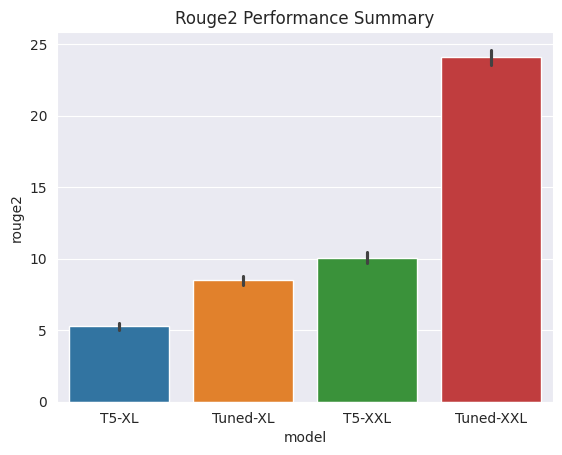

In [5]:
sns.barplot(compiled_df, x="model", y="rouge2", errorbar="ci", hue="model")
plt.title("Rouge2 Performance Summary")
plt.show()

In [6]:
flan_xl_ai["model"] = "T5-XL"
sum_xl_ai["model"] = "Tuned-XL"
flan_xxl_ai["model"] = "T5-XXL"
sum_xxl_ai["model"] = "Tuned-XXL"
compiled_ai_df = pd.concat([flan_xl_ai[["rating", "model"]], sum_xl_ai[["rating", "model"]],
                            flan_xxl_ai[["rating", "model"]], sum_xxl_ai[["rating", "model"]]], ignore_index=True)
compiled_ai_df.head()

,rating,model
0,1.0,T5-XL
1,1.0,T5-XL
2,4.0,T5-XL
3,5.0,T5-XL
4,4.0,T5-XL


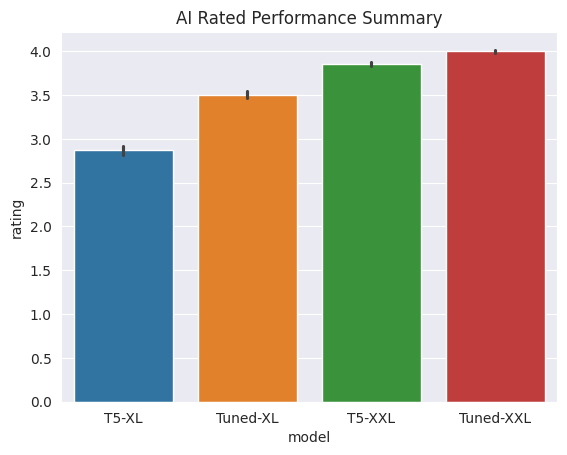

In [8]:
sns.barplot(compiled_ai_df, x="model", y="rating", errorbar="ci", hue="model")
plt.title("AI Rated Performance Summary")
plt.show()